# Naive Bayes Pratical Implementation

In [1]:
from sklearn.datasets import load_iris 

In [3]:
X,y = load_iris(return_X_y=True)

In [4]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [6]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=10)


In [7]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [8]:
gnb.fit(X_train,y_train)

GaussianNB()

In [10]:
y_pred = gnb.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[14  0  0]
 [ 0 17  0]
 [ 0  0 14]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        17
           2       1.00      1.00      1.00        14

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45

1.0


# Assignment--

In [14]:
import seaborn as sns

In [69]:
df = sns.load_dataset('tips')

In [70]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [71]:
# Checking for null value 
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [72]:
# Checking for duplicate value. 
df[df.duplicated()]

,total_bill,tip,sex,smoker,day,time,size
202,13.0,2.0,Female,Yes,Thur,Lunch,2


In [73]:
# Removing the duplicate value. 
df_copy = df

In [74]:
df_copy.drop(202,inplace=True)

In [75]:
df_copy.duplicated().sum()

np.int64(0)

In [76]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    category
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 9.1 KB


In [77]:
df_copy['sex'].unique()

['Female', 'Male']
Categories (2, object): ['Male', 'Female']

In [78]:
df_copy['sex'] = df_copy['sex'].map({'Male':1,'Female':0}).astype(str)

In [79]:
df_copy['sex'].unique()

array(['0', '1'], dtype=object)

In [80]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    object  
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(3), float64(2), int64(1), object(1)
memory usage: 10.6+ KB


In [82]:
df_copy[~df_copy['sex'].str.isnumeric()]

,total_bill,tip,sex,smoker,day,time,size


In [83]:
df_copy['sex'] = df_copy['sex'].astype(int)

In [84]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    int64   
 3   smoker      243 non-null    category
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(3), float64(2), int64(2)
memory usage: 10.6 KB


In [87]:
df_copy['smoker'].unique()

['No', 'Yes']
Categories (2, object): ['Yes', 'No']

In [88]:
df_copy['smoker'] = df_copy['smoker'].map({'Yes':1,'No':0}).astype(int)

In [89]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    int64   
 3   smoker      243 non-null    int64   
 4   day         243 non-null    category
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(2), float64(2), int64(3)
memory usage: 12.2 KB


In [90]:
df_copy['day'].unique()

['Sun', 'Sat', 'Thur', 'Fri']
Categories (4, object): ['Thur', 'Fri', 'Sat', 'Sun']

In [91]:
df_copy['day'] = df_copy['day'].map({'Sun':0,'Thur':1,'Fri':2,'Sat':3}).astype(int)

In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  243 non-null    float64 
 1   tip         243 non-null    float64 
 2   sex         243 non-null    int64   
 3   smoker      243 non-null    int64   
 4   day         243 non-null    int64   
 5   time        243 non-null    category
 6   size        243 non-null    int64   
dtypes: category(1), float64(2), int64(4)
memory usage: 13.6 KB


In [93]:
df_copy['time'].unique()

['Dinner', 'Lunch']
Categories (2, object): ['Lunch', 'Dinner']

In [94]:
df_copy['time'] = df_copy['time'].map({'Dinner':1,'Lunch':0}).astype(int)

In [95]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  243 non-null    float64
 1   tip         243 non-null    float64
 2   sex         243 non-null    int64  
 3   smoker      243 non-null    int64  
 4   day         243 non-null    int64  
 5   time        243 non-null    int64  
 6   size        243 non-null    int64  
dtypes: float64(2), int64(5)
memory usage: 15.2 KB


In [96]:
df_copy.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,0,1,2
1,10.34,1.66,1,0,0,1,3
2,21.01,3.50,1,0,0,1,3
3,23.68,3.31,1,0,0,1,2
4,24.59,3.61,0,0,0,1,4


In [98]:
df_copy.columns

Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')

In [101]:
# Independent and Dependent feature. 
X = df_copy[['total_bill', 'tip', 'sex', 'smoker', 'day', 'size']]
y = df_copy['time']

In [100]:
X.head()

,total_bill,tip,sex,smoker,day,size
0,16.99,1.01,0,0,0,2
1,10.34,1.66,1,0,0,3
2,21.01,3.50,1,0,0,3
3,23.68,3.31,1,0,0,2
4,24.59,3.61,0,0,0,4


In [102]:
y

0      1
1      1
2      1
3      1
4      1
      ..
239    1
240    1
241    1
242    1
243    1
Name: time, Length: 243, dtype: int64

In [103]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [104]:
X_train.shape,X_test.shape

((170, 6), (73, 6))

In [105]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()

In [106]:
gnb.fit(X_train,y_train)

GaussianNB()

In [109]:
y_pred = gnb.predict(X_test)

In [110]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[13  3]
 [ 0 57]]
              precision    recall  f1-score   support

           0       1.00      0.81      0.90        16
           1       0.95      1.00      0.97        57

    accuracy                           0.96        73
   macro avg       0.97      0.91      0.94        73
weighted avg       0.96      0.96      0.96        73

0.958904109589041


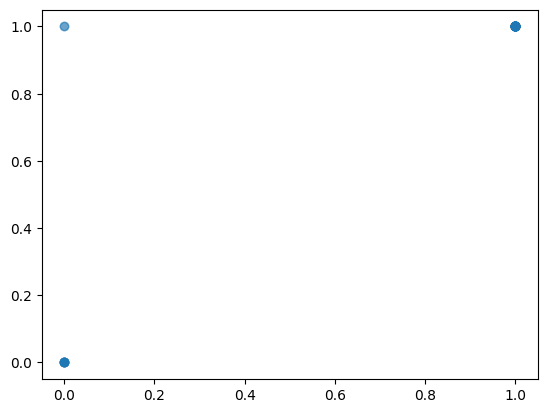

In [114]:
import matplotlib.pyplot as plt
plt.scatter(x = y_test, y = y_pred,alpha=0.3)

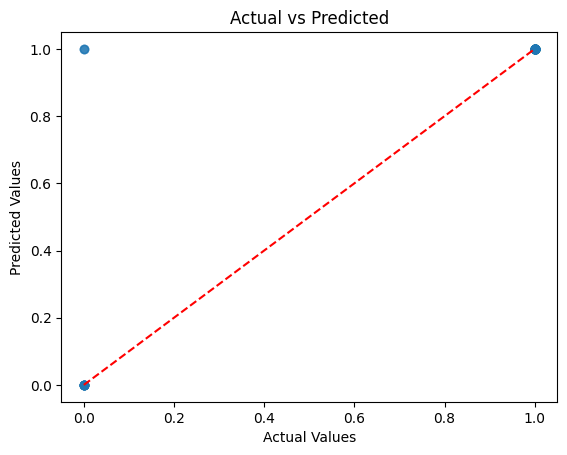

In [115]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color="red", linestyle="--")  # Perfect fit line
plt.show()
